In [ ]:
import pandas as pd
import numpy as np
import joblib
import scipy.stats as stats

# 1. Data collection

In [ ]:
data_path = "/content/drive/MyDrive/smoke_detection_iot.csv"
df = pd.read_csv(data_path, index_col=0)
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
joblib.dump(df, "df_raw.pkl")

['df_raw.pkl']

# 2. Data definition

definisi semua fitur yang terdapat pada dataset.

definisi bisa didapatkan dari sumber dataset baik berupa website atau paper yang terbit bersamaan dengan data tersebut. Jika tidak ditemukan, pendefinisian data bisa dilakukan bersama domain expert

data smoke detection berasal dari eksperimen pengembang piranti IoT. Sumber rujukan utama terdapat pada tautan berikut: [(Source)](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


UTC: 
    definition: Total Volatile Organic Compounds; measured in parts per billion
    type: datetime in UTC seconds
    range:
    

# 3. Data Validation

## 3.1 Data types

In [ ]:
df.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

hasil menunjukkan terdapat dua jenis tipe data yakni integer dan float.

UTC yang merupakan timestamp seharusnya memiliki tipe data date.time.
Sementara itu, jika merujuk pada sumber data dijelaskan bahwa semua fitur memiliki tipe data float (kecuali CNT yang hanya merupakan counter yang ditambahkan pengembang untuk memudahkan proses perhitungan sampel). 

sehingga selanjutnya kita harus merubah semua fitur (kecuali UTC dan CNT) menjadi tipe float.

terakhir, fitur target yakni Fire Alarm adalah bernilai biner (binary) dengan nilai 1 dan 0 sehingga sudah tepat bertipe integer.

### 3.1.1 Handling fitur UTC

In [ ]:
# merubah tipe data fitur UTC menjadi datetime sesuai arahan pada sumber data
df.UTC = pd.to_datetime(df.UTC, unit="s", origin="unix")
df.dtypes

UTC               datetime64[ns]
Temperature[C]           float64
Humidity[%]              float64
TVOC[ppb]                  int64
eCO2[ppm]                  int64
Raw H2                     int64
Raw Ethanol                int64
Pressure[hPa]            float64
PM1.0                    float64
PM2.5                    float64
NC0.5                    float64
NC1.0                    float64
NC2.5                    float64
CNT                        int64
Fire Alarm                 int64
dtype: object

In [ ]:
sorted(df.UTC.value_counts().index)

[Timestamp('2022-06-08 18:16:27'),
 Timestamp('2022-06-08 18:16:28'),
 Timestamp('2022-06-08 18:16:29'),
 Timestamp('2022-06-08 18:16:30'),
 Timestamp('2022-06-08 18:16:31'),
 Timestamp('2022-06-08 18:16:32'),
 Timestamp('2022-06-08 18:16:33'),
 Timestamp('2022-06-08 18:16:34'),
 Timestamp('2022-06-08 18:16:35'),
 Timestamp('2022-06-08 18:16:36'),
 Timestamp('2022-06-08 18:16:37'),
 Timestamp('2022-06-08 18:16:38'),
 Timestamp('2022-06-08 18:16:39'),
 Timestamp('2022-06-08 18:16:40'),
 Timestamp('2022-06-08 18:16:41'),
 Timestamp('2022-06-08 18:16:42'),
 Timestamp('2022-06-08 18:16:43'),
 Timestamp('2022-06-08 18:16:44'),
 Timestamp('2022-06-08 18:16:45'),
 Timestamp('2022-06-08 18:16:46'),
 Timestamp('2022-06-08 18:16:47'),
 Timestamp('2022-06-08 18:16:48'),
 Timestamp('2022-06-08 18:16:49'),
 Timestamp('2022-06-08 18:16:50'),
 Timestamp('2022-06-08 18:16:51'),
 Timestamp('2022-06-08 18:16:52'),
 Timestamp('2022-06-08 18:16:53'),
 Timestamp('2022-06-08 18:16:54'),
 Timestamp('2022-06-

### 3.1.2 Merubah fitur yang awalnya integer menjadi float, sesuai keterangan pada sumber data

In [ ]:
# ambil nama fitur/kolom data yang memiliki tipe data int64 dan masukkan ke list
int_list = [integers for integers in df.columns if df[integers].dtypes == "int64"]
int_list

['TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'CNT', 'Fire Alarm']

In [ ]:
# remove CNT (sesuai definisi yang didapatkan dari sumber data)
int_list.remove("CNT")

# remove Fire Alarm yang merupakan fitur target
int_list.remove("Fire Alarm")

int_list

['TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol']

In [ ]:
# ubah fitur/kolom menjadi float64
df[int_list] = df[int_list].astype("float64")
df.dtypes

UTC               datetime64[ns]
Temperature[C]           float64
Humidity[%]              float64
TVOC[ppb]                float64
eCO2[ppm]                float64
Raw H2                   float64
Raw Ethanol              float64
Pressure[hPa]            float64
PM1.0                    float64
PM2.5                    float64
NC0.5                    float64
NC1.0                    float64
NC2.5                    float64
CNT                        int64
Fire Alarm                 int64
dtype: object

In [ ]:
# cek dataset
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,2022-06-09 00:08:51,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,2022-06-09 00:08:52,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2022-06-09 00:08:53,20.029,55.96,0.0,400.0,12374.0,18764.0,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,2022-06-09 00:08:54,20.044,55.28,0.0,400.0,12390.0,18849.0,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,2022-06-09 00:08:55,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,2022-06-13 14:20:47,18.438,15.79,625.0,400.0,13723.0,20569.0,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,2022-06-13 14:20:48,18.653,15.87,612.0,400.0,13731.0,20588.0,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,2022-06-13 14:20:49,18.867,15.84,627.0,400.0,13725.0,20582.0,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,2022-06-13 14:20:50,19.083,16.04,638.0,400.0,13712.0,20566.0,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


## 3.2 Feature ranges

In [ ]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


## 3.3 Handling fitur "CNT" yang hanya merupakan counter (menurut sumber data)

In [ ]:
# berdasarkan sumber daya, CNT dapat dihilangkan saja.
df.drop(["CNT"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   UTC             62630 non-null  datetime64[ns]
 1   Temperature[C]  62630 non-null  float64       
 2   Humidity[%]     62630 non-null  float64       
 3   TVOC[ppb]       62630 non-null  float64       
 4   eCO2[ppm]       62630 non-null  float64       
 5   Raw H2          62630 non-null  float64       
 6   Raw Ethanol     62630 non-null  float64       
 7   Pressure[hPa]   62630 non-null  float64       
 8   PM1.0           62630 non-null  float64       
 9   PM2.5           62630 non-null  float64       
 10  NC0.5           62630 non-null  float64       
 11  NC1.0           62630 non-null  float64       
 12  NC2.5           62630 non-null  float64       
 13  Fire Alarm      62630 non-null  int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usa

# 4. Data Defense

tidak dibahas sekarang, cukup tahu bahwa ada mekanisme data defense untuk mencegah terjadinya error input yang mungkin dapat menyebabkan sistem down

# 5. Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

# define X and y
X = df.drop(["Fire Alarm", "UTC"], axis=1)
y = df["Fire Alarm"]

# print(X.shape)
# print(y.shape)

# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# split test-valid
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [ ]:
print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"x_valid shape:{X_valid.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_valid shape: {y_valid.shape}")

x_train shape: (37578, 12)
x_test shape: (12526, 12)
x_valid shape:(12526, 12)
y_train shape: (37578,)
y_test shape: (12526,)
y_valid shape: (12526,)


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

In [ ]:
# ambil dahulu X_train dan y_train dan kemudian concat utk keperluan eksplorasi
# simpan di variabel lain agar jika kita mengubah2 utk eksplorasi tidak memengaruhi data training asli

explore_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
explore_train

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,-5.230,47.12,126.0,400.0,12784.0,20607.0,937.350,1.62,1.68,11.12,1.734,0.039,0
1,-11.882,47.86,1344.0,406.0,12960.0,19384.0,938.744,1.95,2.02,13.39,2.088,0.047,1
2,22.330,55.13,698.0,705.0,12776.0,19555.0,939.144,2.01,2.08,13.81,2.153,0.049,1
3,-19.638,47.87,1316.0,400.0,12972.0,19410.0,938.738,1.93,2.00,13.26,2.067,0.047,1
4,24.870,52.05,1111.0,451.0,12865.0,19454.0,938.838,1.85,1.92,12.73,1.985,0.045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37573,-0.481,51.57,132.0,400.0,13222.0,20088.0,939.619,1.77,1.84,12.16,1.896,0.043,1
37574,-6.808,45.95,82.0,409.0,12784.0,20659.0,937.511,2.37,2.46,16.33,2.546,0.058,0
37575,26.577,56.23,1.0,400.0,13095.0,19993.0,939.719,0.61,0.63,4.19,0.654,0.015,0
37576,26.950,47.83,1174.0,400.0,12930.0,19427.0,938.720,1.75,1.82,12.03,1.875,0.042,1


In [ ]:
explore_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37578 entries, 0 to 37577
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  37578 non-null  float64
 1   Humidity[%]     37578 non-null  float64
 2   TVOC[ppb]       37578 non-null  float64
 3   eCO2[ppm]       37578 non-null  float64
 4   Raw H2          37578 non-null  float64
 5   Raw Ethanol     37578 non-null  float64
 6   Pressure[hPa]   37578 non-null  float64
 7   PM1.0           37578 non-null  float64
 8   PM2.5           37578 non-null  float64
 9   NC0.5           37578 non-null  float64
 10  NC1.0           37578 non-null  float64
 11  NC2.5           37578 non-null  float64
 12  Fire Alarm      37578 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 3.7 MB


pada kasus kali ini, kita tidak melakukan time series, shg datetime bisa diabaikan (drop)

## Cek skewness

In [ ]:
explore_train.skew(numeric_only=True)

Temperature[C]    -0.637751
Humidity[%]       -2.470538
TVOC[ppb]          6.924251
eCO2[ppm]         12.908993
Raw H2            -2.899941
Raw Ethanol       -1.674744
Pressure[hPa]     -3.610689
PM1.0             10.709744
PM2.5             13.950914
NC0.5             10.067249
NC1.0             14.236157
NC2.5             17.349418
Fire Alarm        -0.950537
dtype: float64

jika kita tentukan threshold skew > +- 0.5 adalah terjadi skewness. Maka: semua fitur terjadi skewness

Kendati pada data kita tidak memiliki *missing value*, informasi skewness dan bentuk data dapat dijadikan report untuk insight pada data yang kita pakai

## Data shape

### Keseluruhan fitur

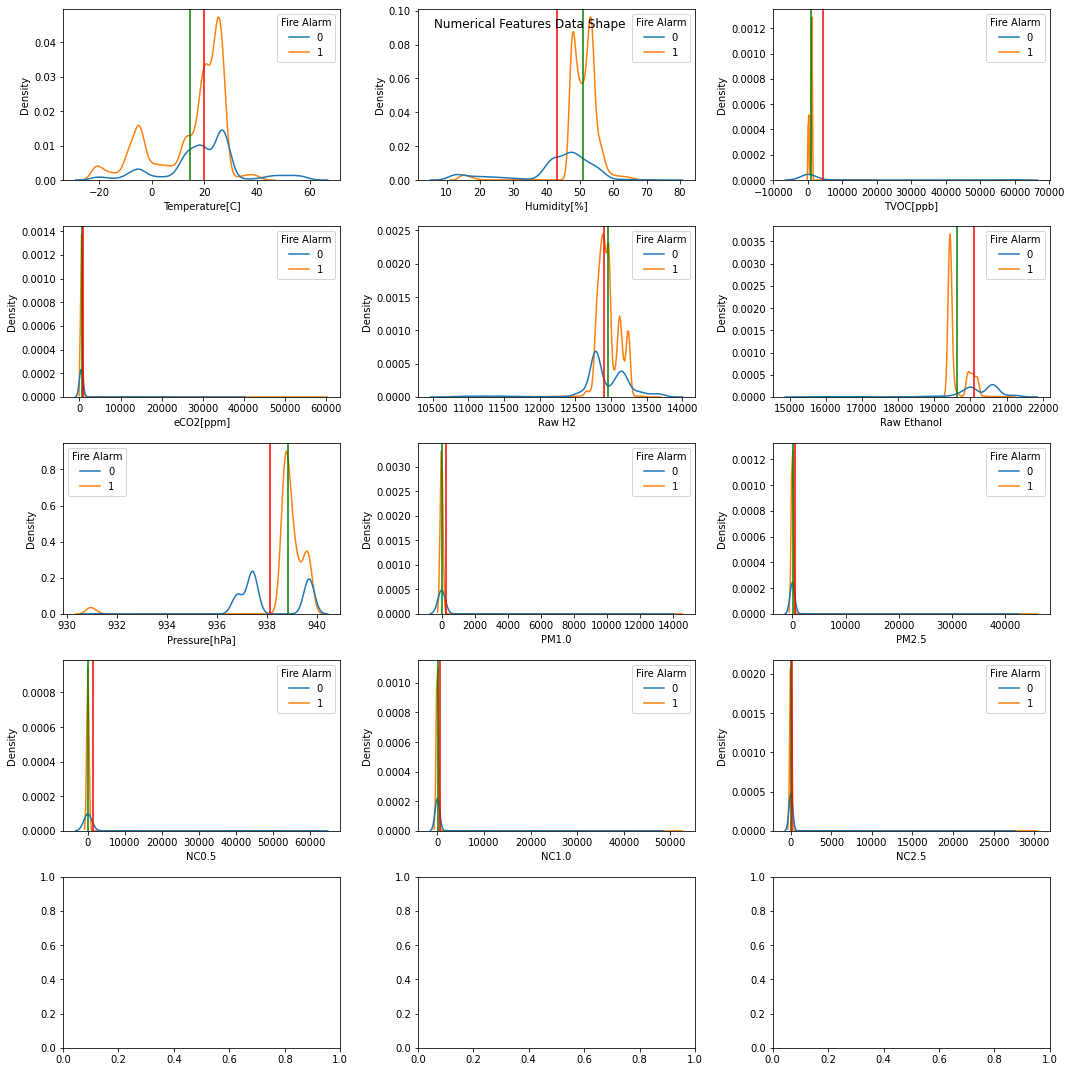

In [ ]:
# cek shape numeric data satu persatu
columns = explore_train.columns
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
fig.suptitle("Numerical Features Data Shape")

k=0
for i in range(5):

  for j in range(3):

    if k >=12:
      break
    
    sns.kdeplot(ax=axes[i,j], data=explore_train, x=columns[k], hue="Fire Alarm")
    axes[i,j].axvline(explore_train[explore_train["Fire Alarm"] == 1][columns[k]].mean(), 0, 1, color="g", label="positive")
    axes[i,j].axvline(explore_train[explore_train["Fire Alarm"] == 0][columns[k]].mean(), 0, 1, color="r", label="negative")

    k = k+1
fig.tight_layout()
plt.show()

karena tidak terdapat *missing value* pada data *smoke_detection*. EDA dengan visualisasi dapat digunakan untuk mendapatkan ***insight*** yang diperlukan ketika membuat laporan akhir.

In [ ]:
def check_dist(col, bins, density=True, plot_normal=True, log_bins=False):
  fig, ax = plt.subplots(figsize=(8,6))

  x = explore_train[col]

  fig.suptitle(f"DISTRIBUTION OF {str(col).upper()}")

  ax.hist(x, density=density, bins=bins)

  ax.axvline(
      explore_train[explore_train["Fire Alarm"] == 1][col].mean(), 0, 1, color='r', label="mean(Fire)",
      linestyle="--", linewidth=0.8
      )
  ax.axvline(
      explore_train[explore_train["Fire Alarm"] == 0][col].mean(), 0, 1, color='g', label="mean(Not Fire)",
      linestyle="--", linewidth=0.8
      )
  
  if plot_normal == True:

    mu, std = stats.norm.fit(x)

    xmin, xmax = plt.xlim()

    x_norm = np.linspace(xmin, xmax, 100)

    pdf = stats.norm.pdf(x_norm, mu, std)

    ax.plot(x_norm, pdf, 'k', linewidth=2, label=f"normal\n(mu:{mu:.2f},std:{std:.2f}")

  ax.legend()

  fig.show()

  print(x.describe())

### Temperature[C]

count    37578.000000
mean        16.004553
std         14.287341
min        -22.010000
25%         11.131500
50%         20.180000
75%         25.430000
max         59.930000
Name: Temperature[C], dtype: float64


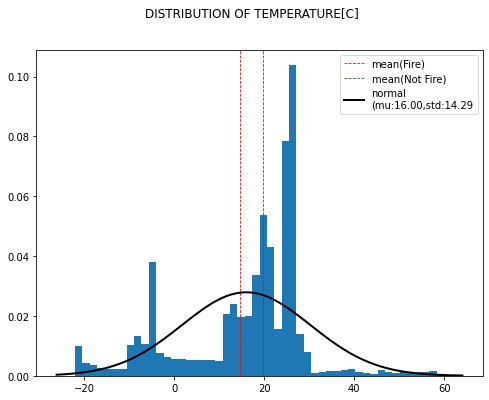

In [ ]:
check_dist("Temperature[C]", bins=50, plot_normal=True)

### Humidity[%]

count    37578.000000
mean        48.575881
std          8.808917
min         10.740000
25%         47.540000
50%         50.160000
75%         53.260000
max         75.200000
Name: Humidity[%], dtype: float64


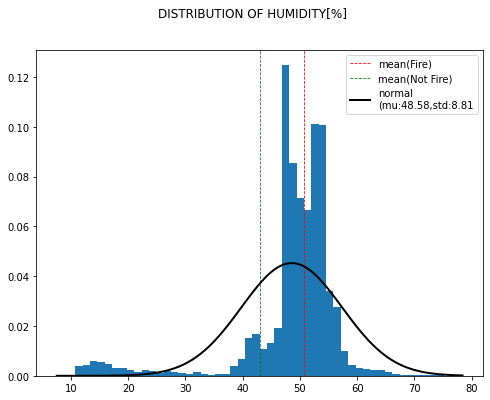

In [ ]:
check_dist("Humidity[%]", bins=50, plot_normal=True)

### TVOC[ppb]

count    37578.000000
mean      1889.403960
std       7644.986082
min          0.000000
25%        131.000000
50%        969.000000
75%       1187.000000
max      60000.000000
Name: TVOC[ppb], dtype: float64


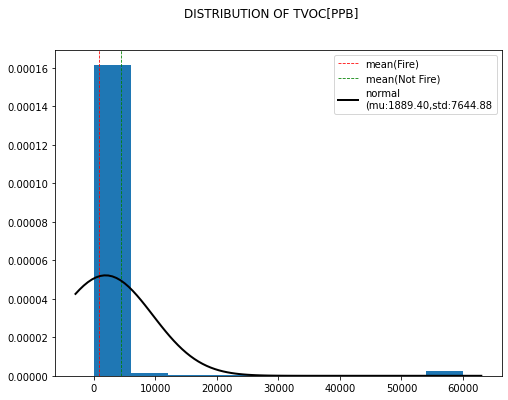

In [ ]:
check_dist("TVOC[ppb]", bins=10, density=True, plot_normal=True)

In [ ]:
explore_train["TVOC[ppb]"].describe()

count    37578.000000
mean      1889.403960
std       7644.986082
min          0.000000
25%        131.000000
50%        969.000000
75%       1187.000000
max      60000.000000
Name: TVOC[ppb], dtype: float64

### eCO2[ppm]

count    37578.000000
mean       666.859732
std       1913.878370
min        400.000000
25%        400.000000
50%        400.000000
75%        438.000000
max      60000.000000
Name: eCO2[ppm], dtype: float64


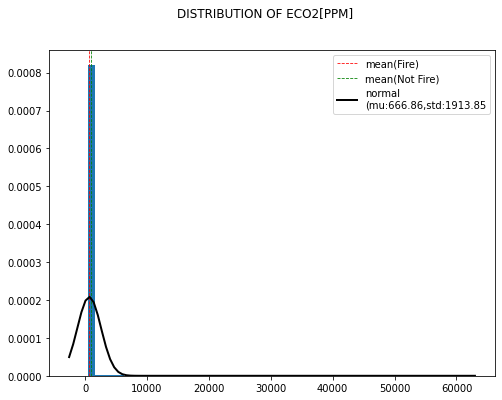

In [ ]:
check_dist("eCO2[ppm]", bins=50, plot_normal=True)

In [ ]:
explore_train["eCO2[ppm]"].describe()

count    37578.000000
mean       666.859732
std       1913.878370
min        400.000000
25%        400.000000
50%        400.000000
75%        438.000000
max      60000.000000
Name: eCO2[ppm], dtype: float64

### Raw H2

count    37578.000000
mean     12943.084943
std        270.728338
min      10668.000000
25%      12830.000000
50%      12924.000000
75%      13109.000000
max      13803.000000
Name: Raw H2, dtype: float64


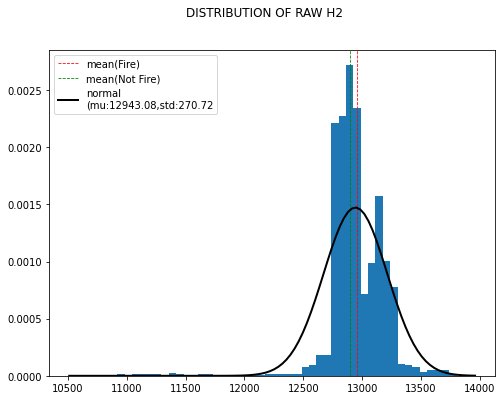

In [ ]:
check_dist("Raw H2", bins=50, plot_normal=True)

### Raw Ethanol

count    37578.000000
mean     19756.990846
std        605.434916
min      15317.000000
25%      19435.000000
50%      19503.000000
75%      20079.000000
max      21410.000000
Name: Raw Ethanol, dtype: float64


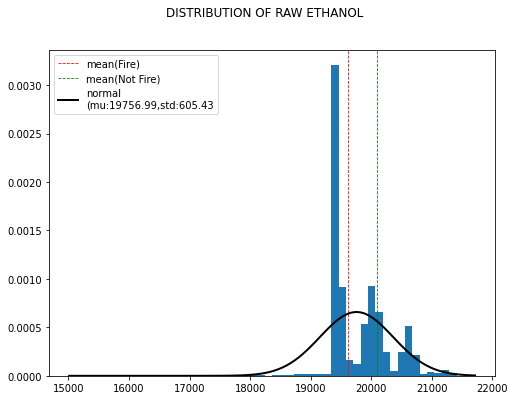

In [ ]:
check_dist("Raw Ethanol", bins=50, plot_normal=True)

### Pressure[hPa]

count    37578.000000
mean       938.631251
std          1.329050
min        930.852000
25%        938.700000
50%        938.817000
75%        939.424000
max        939.861000
Name: Pressure[hPa], dtype: float64


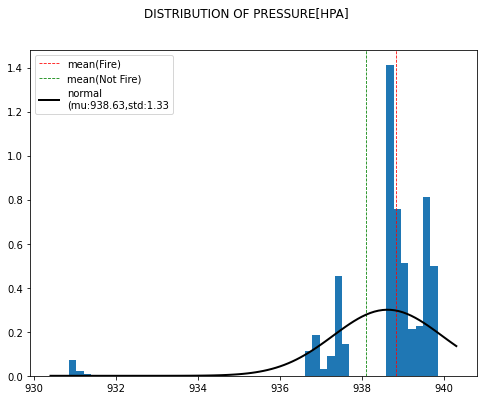

In [ ]:
check_dist("Pressure[hPa]", bins=50, plot_normal=True)

### PM1.0

count    37578.000000
mean       102.023398
std        936.900854
min          0.000000
25%          1.280000
50%          1.810000
75%          2.090000
max      14318.170000
Name: PM1.0, dtype: float64


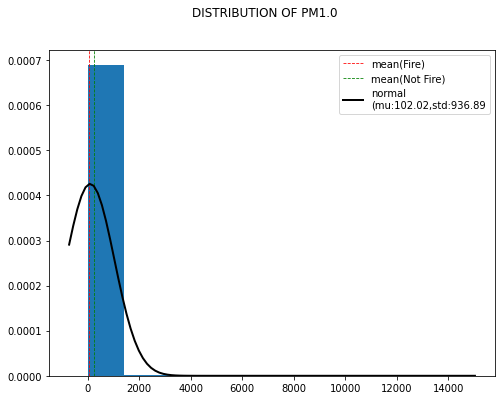

In [ ]:
check_dist("PM1.0", bins=10, plot_normal=True)

### PM2.5

count    37578.000000
mean       189.932782
std       2026.473967
min          0.000000
25%          1.340000
50%          1.880000
75%          2.180000
max      45432.260000
Name: PM2.5, dtype: float64


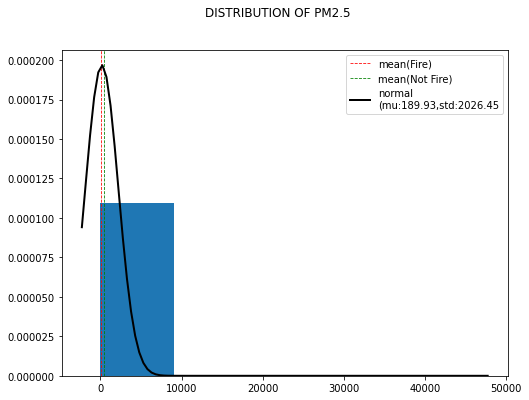

In [ ]:
check_dist("PM2.5", bins=5, plot_normal=True)

### NC0.5

count    37578.000000
mean       491.298790
std       4278.292834
min          0.000000
25%          8.820000
50%         12.440000
75%         14.410000
max      61482.030000
Name: NC0.5, dtype: float64


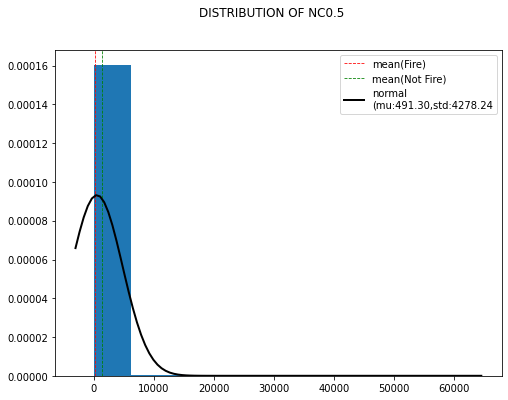

In [ ]:
check_dist("NC0.5", bins=10, plot_normal=True)

### NC1.0

count    37578.000000
mean       209.880526
std       2272.172415
min          0.000000
25%          1.384000
50%          1.940000
75%          2.248000
max      51914.680000
Name: NC1.0, dtype: float64


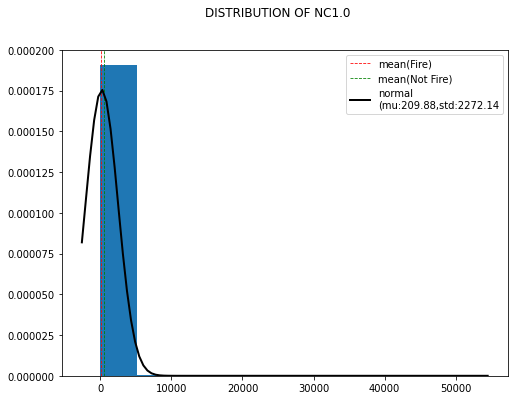

In [ ]:
check_dist("NC1.0", bins=10, plot_normal=True)

### NC2.5

count    37578.000000
mean        83.947284
std       1116.187581
min          0.000000
25%          0.033000
50%          0.044000
75%          0.051000
max      30026.438000
Name: NC2.5, dtype: float64


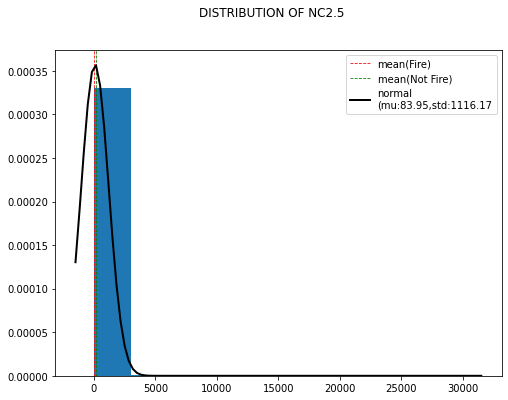

In [ ]:
check_dist("NC2.5", bins=10, plot_normal=True)

## Heatmap

In [ ]:
train_corr = explore_train.drop("Fire Alarm", axis=1).corr(method="pearson").abs()

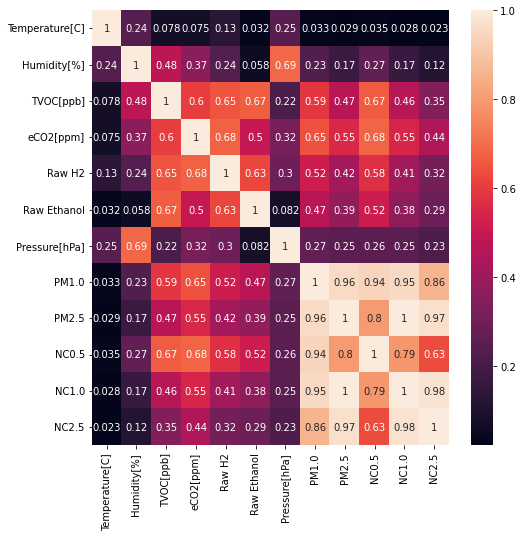

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train_corr, annot=True)
plt.show()

misal, jika korelasi >= +- 0.5 kita katakan berhubungan sangat kuat.

maka, fitur2 yang berhubungan kuat bisa diperlukan lebih lanjut, atau ditelisik lebih jauh

In [ ]:
def correlated(x):
  print(x.upper())
  print("----------")
  tmp = train_corr[train_corr[x] >= 0.5][x]
  return tmp

### All Correlation

In [ ]:
for col in train_corr.columns:
  print(correlated(col))
  print()

TEMPERATURE[C]
----------
Temperature[C]    1.0
Name: Temperature[C], dtype: float64

HUMIDITY[%]
----------
Humidity[%]      1.000000
Pressure[hPa]    0.689027
Name: Humidity[%], dtype: float64

TVOC[PPB]
----------
TVOC[ppb]      1.000000
eCO2[ppm]      0.603242
Raw H2         0.649562
Raw Ethanol    0.670093
PM1.0          0.590546
NC0.5          0.665043
Name: TVOC[ppb], dtype: float64

ECO2[PPM]
----------
TVOC[ppb]    0.603242
eCO2[ppm]    1.000000
Raw H2       0.675772
PM1.0        0.646112
PM2.5        0.554944
NC0.5        0.682748
NC1.0        0.546822
Name: eCO2[ppm], dtype: float64

RAW H2
----------
TVOC[ppb]      0.649562
eCO2[ppm]      0.675772
Raw H2         1.000000
Raw Ethanol    0.625872
PM1.0          0.518506
NC0.5          0.575652
Name: Raw H2, dtype: float64

RAW ETHANOL
----------
TVOC[ppb]      0.670093
Raw H2         0.625872
Raw Ethanol    1.000000
NC0.5          0.518312
Name: Raw Ethanol, dtype: float64

PRESSURE[HPA]
----------
Humidity[%]      0.689027
P

In [ ]:
def plot_corr(x, y):

  plt.subplots()
  sns.scatterplot(data=explore_train, x=x, y=y, hue="Fire Alarm")
  plt.show()

### Humidity x Pressure

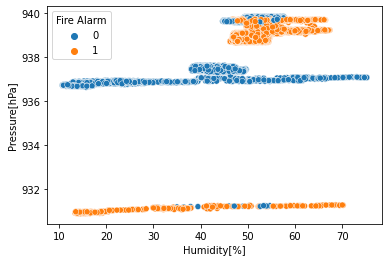

In [ ]:
plot_corr("Humidity[%]", "Pressure[hPa]")

### TVOC

    TVOC[ppb]      1.000000
    eCO2[ppm]      0.587193
    Raw H2         0.641993
    Raw Ethanol    0.662571
    PM1.0          0.587739
    NC0.5          0.672505

#### TVOC x ECO2

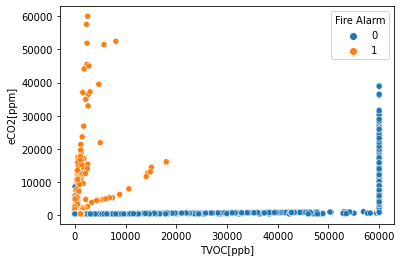

In [ ]:
plot_corr("TVOC[ppb]", "eCO2[ppm]")

#### TVOC x Raw H2

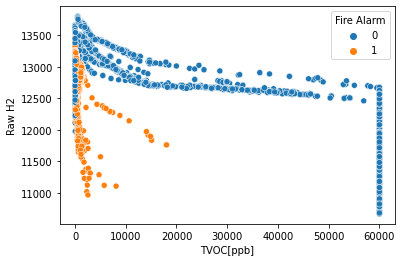

In [ ]:
plot_corr("TVOC[ppb]", "Raw H2")

#### TVOC x Raw Ethanol

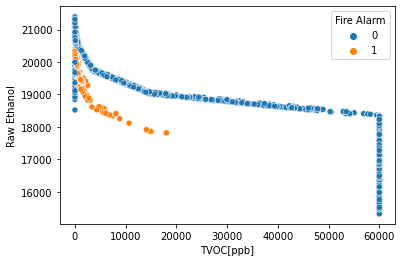

In [ ]:
plot_corr("TVOC[ppb]", "Raw Ethanol")

#### TVOC x PM1.0

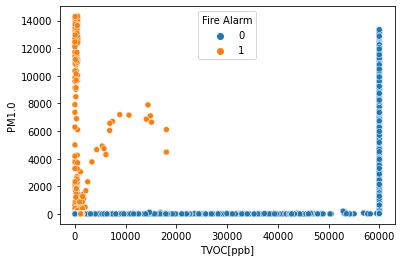

In [ ]:
plot_corr("TVOC[ppb]", "PM1.0")

#### TVOC x NC0.5

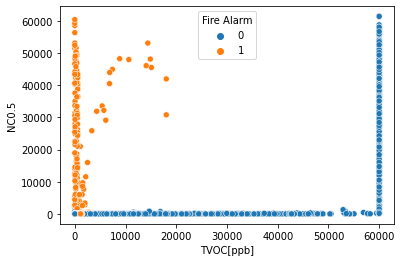

In [ ]:
plot_corr("TVOC[ppb]", "NC0.5")

### eCO2

In [ ]:
correlated("eCO2[ppm]")

ECO2[PPM]
----------


TVOC[ppb]    0.603242
eCO2[ppm]    1.000000
Raw H2       0.675772
PM1.0        0.646112
PM2.5        0.554944
NC0.5        0.682748
NC1.0        0.546822
Name: eCO2[ppm], dtype: float64

## Statistical Inference

### Students t test

Student t test digunakan untuk melihat signifikansi perbedaan miu antara dua kelompok. Sedangkan ANOVA digunakan apabila lebih dari dua kelompok

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 44.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=033bbb3275c8e69fdd994f9278bd0070e56ae9e3faea8f0f819bcf11db047777
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=ee320243b47dd61edc18d733646a70dc19ef47b44a38d2dc714e22141cc09334
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pingouin as pg

In [ ]:
# pisahkan data berdasarkan kelas

fire_class = explore_train[explore_train["Fire Alarm"] == 1]
notfire_class = explore_train[explore_train["Fire Alarm"] == 0]

In [ ]:
def ttest(x):
  
  res = pg.ttest(fire_class[x], notfire_class[x], correction=True)
  return res

In [ ]:
for col in fire_class.columns:
  
  print(col.upper())
  print("-------------------------------")
  print(ttest(col))
  print()


TEMPERATURE[C]
-------------------------------
                T           dof alternative          p-val           CI95%  \
T-test -31.213244  18514.224487   two-sided  1.727822e-208  [-5.51, -4.86]   

         cohen-d        BF10  power  
T-test  0.367945  7.596e+206    1.0  

HUMIDITY[%]
-------------------------------
                T           dof alternative  p-val         CI95%   cohen-d  \
T-test  64.875638  12884.187146   two-sided    0.0  [7.57, 8.04]  0.966734   

       BF10  power  
T-test  inf    1.0  

TVOC[PPB]
-------------------------------
                T           dof alternative          p-val  \
T-test -26.213443  10735.483925   two-sided  7.336973e-147   

                       CI95%   cohen-d        BF10  power  
T-test  [-3801.76, -3272.75]  0.473127  8.058e+145    1.0  

ECO2[PPM]
-------------------------------
                T          dof alternative         p-val               CI95%  \
T-test -13.585366  12505.77702   two-sided  9.669610e-42  [-453.1

/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/usr/local/lib/python3.7/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


                T           dof alternative         p-val              CI95%  \
T-test -12.398656  13446.772653   two-sided  4.133271e-35  [-417.35, -303.4]   

         cohen-d       BF10  power  
T-test  0.178406  2.554e+31    1.0  

NC0.5
-------------------------------
                T           dof alternative         p-val  \
T-test -16.667126  11638.150929   two-sided  1.175728e-61   

                       CI95%   cohen-d       BF10  power  
T-test  [-1298.01, -1024.83]  0.273527  1.519e+58    1.0  

NC1.0
-------------------------------
               T           dof alternative         p-val               CI95%  \
T-test -12.14878  13527.614312   two-sided  8.730876e-34  [-457.72, -330.54]   

         cohen-d       BF10  power  
T-test  0.173993  1.206e+30    1.0  

NC2.5
-------------------------------
               T           dof alternative         p-val               CI95%  \
T-test -8.888889  14396.784978   two-sided  6.895083e-19  [-165.39, -105.63]   

         co

/usr/local/lib/python3.7/dist-packages/pingouin/effsize.py:803: RuntimeWarning: divide by zero encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd
/usr/local/lib/python3.7/dist-packages/pingouin/parametric.py:275: RuntimeWarning: invalid value encountered in multiply
  ci = np.array([tval - tcrit, tval + tcrit]) * se


sepertinya, semuanya *statistically significance*

## Outlier detection

### Using Boxplot

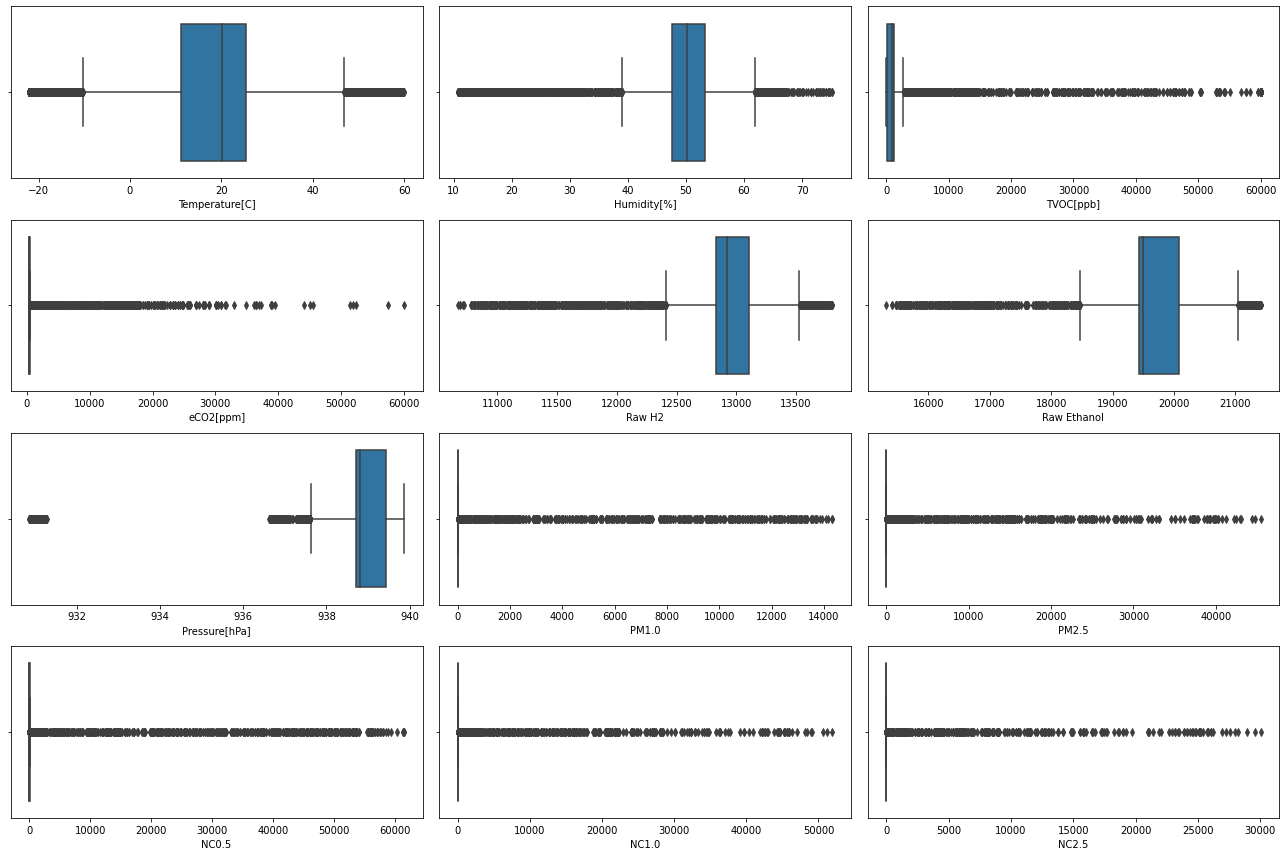

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(18,12))

c=0
for i in range(5):
  for j in range(3):

    if c >=12:
      break

    sns.boxplot(ax=ax[i,j], data=explore_train, x=explore_train.columns[c])

    c=c+1

fig.tight_layout()
fig.show()

In [ ]:
def show_outliers(x, more_than, less_than):

  res = explore_train[np.logical_or(explore_train[x]>50, explore_train[x]<-10)][x]

  return res

### Using Z-Score

Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

  ***Zscore = (data_point -mean) / std. deviation***

Suppose we define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [ ]:
threshold=3 #std dev

for col in explore_train.columns:
  
  if col == "Fire Alarm":
    break

  z = np.abs(stats.zscore(explore_train[col]))
  out_index = np.where(z>3)
  print(col.upper())
  print(f"ada sebanyak {out_index[0].shape[0]} outlier")
  print()

TEMPERATURE[C]
ada sebanyak 35 outlier

HUMIDITY[%]
ada sebanyak 1659 outlier

TVOC[PPB]
ada sebanyak 740 outlier

ECO2[PPM]
ada sebanyak 446 outlier

RAW H2
ada sebanyak 581 outlier

RAW ETHANOL
ada sebanyak 483 outlier

PRESSURE[HPA]
ada sebanyak 690 outlier

PM1.0
ada sebanyak 417 outlier

PM2.5
ada sebanyak 351 outlier

NC0.5
ada sebanyak 462 outlier

NC1.0
ada sebanyak 341 outlier

NC2.5
ada sebanyak 257 outlier



## Check Class Imbalance

In [ ]:
explore_train["Fire Alarm"] = explore_train["Fire Alarm"].map({1:"Fire", 0:"Not_fire"})

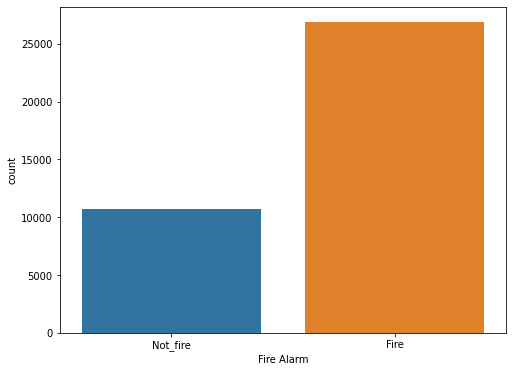

In [ ]:
plt.subplots(figsize=(8,6))
sns.countplot(data=explore_train, x="Fire Alarm")
plt.show()

In [ ]:
explore_train["Fire Alarm"].value_counts()

print("Class ratio: 1 :", np.ceil(explore_train["Fire Alarm"].value_counts()[0]/explore_train["Fire Alarm"].value_counts()[1]))

Class ratio: 1 : 3.0


balancing would be down-sample

## Summary of Exploration

1. Secara umum fitur mengikuti pola distribusi normal, namun terdapat skewness yang sangat tinggi pada beberapa fitur,
2. Perlu digali lebih dalam korelasi antar fitur. bukan sekedar korelasi secara statistik namun juga secara skenario pada kejadian nyata (read source again),
3. Terdapat outlier (kemungkinan harus di buang),
4. Perbedaan skala pengukuran --> Scaling,
5. Terdapat kelas tidak seimbang

# Preprocessing and Feature Engineering

**TO DO LIST**

1. Outlier Removal
2. Class balancing
3. Feature selection (if necessary)
4. Feature scaling (or standardizing or both)

## Outlier Handling

because majority of our features are heavily skewed. We shouldn't use z-score outlier removal. instead, we'll filter outlier using IQR

but, we still have to choose the outlier handling method. The options are:
* Trim all detected outlier (remove them)
* Quantile based flooring and capping
* Mean/Median imputation

further reading: [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

for the sake of simplicity, we'll use third method.

**REMEMBER**

from EDA, we know that our data is skewed. Thus, we should use median. In order to get thing simple, we only use the median of the feature regardless of the label

In [ ]:
# reset index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):

  outliers = []
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  # print(lwr_bound, upr_bound)
  for i in data: 
      if (i<lwr_bound or i>upr_bound):
          outliers.append(i)
  return outliers

In [ ]:
# function to handle outlier by median imputation
# jika bukand set train, isikan nama kolom pada colnames dan ubah not_train menjadi True
def handle_outlier(data, colnames=None, not_train=False):

  colnames=colnames
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  median = np.median(data)
  
  if not_train == True:
    median = np.median(X_train[colnames])
    data = np.where(np.logical_or(data<lwr_bound, data>upr_bound), median, data)

  else:
    data = np.where(np.logical_or(data<lwr_bound, data>upr_bound), median, data)

  return data

### Handle Training Set

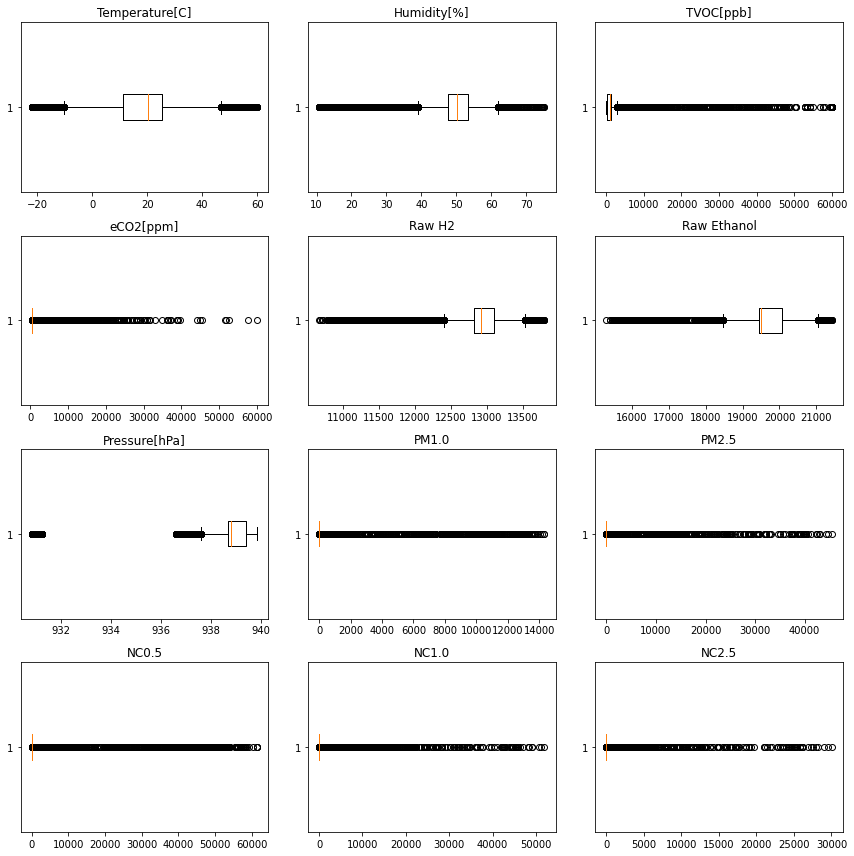

In [ ]:
# before outlier handling

fig, ax = plt.subplots(4,3,figsize=(12,12))

c=0
for i in range(4):
  for j in range(3):
    ax[i,j].boxplot(X_train[X_train.columns[c]], vert=False)
    ax[i,j].title.set_text(str(X_train.columns[c]))
    c = c+1

fig.tight_layout()
fig.show()

In [ ]:
for col in X_train.columns:
  X_train[col] = handle_outlier(X_train[col])

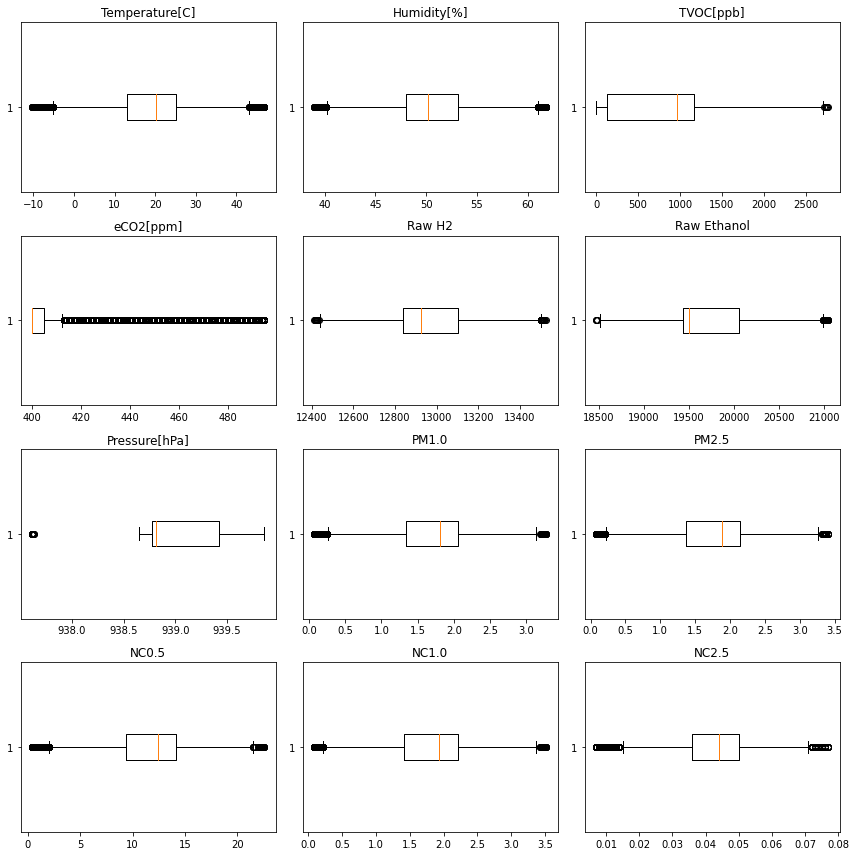

In [ ]:
# after outlier handling

fig, ax = plt.subplots(4,3,figsize=(12,12))

c=0
for i in range(4):
  for j in range(3):
    ax[i,j].boxplot(X_train[X_train.columns[c]], vert=False)
    ax[i,j].title.set_text(str(X_train.columns[c]))
    c = c+1

fig.tight_layout()
fig.show()

### Handle Test and Validation Set

In [ ]:
for col in X_train.columns:
  X_valid[col] = handle_outlier(X_valid[col], col, not_train=True)
  X_test[col] = handle_outlier(X_test[col], col, not_train=True)

## Feature scaling

⚠⚠⚠⚠⚠

**NOTES**

What to use? min-max scaler [0,1] or standardizer (mean=0, sd=1)?

Actually, it depends. Predictive modeling problems can be complex, and it may not be clear how to best scale input data. So, as many sources mention that standardization would comes in handy. we'll use it in here.

further readings: [machinelearningmastery](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

🔴🔴🔴

**WARNING**

ONLY USE TRAINING SET TO FIT ALL PREPROCESSOR

In [ ]:
# import necessary library

from sklearn.preprocessing import StandardScaler

In [ ]:
# initialize the scaler

std_scaler = StandardScaler()

In [ ]:
# fit to training data

std_scaler.fit(X_train)

StandardScaler()

In [ ]:
# transform training data
X_train = std_scaler.transform(X_train)

# show the results
print(X_train)

[[-1.48626927 -0.16527576 -0.23066457 ... -0.11223757 -0.09160806
  -0.075175  ]
 [-1.95186246 -0.08126886 -0.07134234 ... -0.11170697 -0.09145225
  -0.07516783]
 [ 0.44273677  0.74404221 -0.15584329 ... -0.1116088  -0.09142365
  -0.07516604]
 ...
 [ 0.73999689  0.86891733 -0.24701537 ... -0.11385739 -0.09208338
  -0.0751965 ]
 [ 0.76610426 -0.08467454 -0.09357944 ... -0.11202486 -0.091546
  -0.07517231]
 [ 0.59112185  0.58624545 -0.09828847 ... -0.11227263 -0.09161818
  -0.075175  ]]


as you can see. the returning results are in numpy array not a dataframe.

but, we can make dataframe out of this

In [ ]:
# pull out the column names seen during fit
col_names = std_scaler.feature_names_in_

# print it
print(col_names)

['Temperature[C]' 'Humidity[%]' 'TVOC[ppb]' 'eCO2[ppm]' 'Raw H2'
 'Raw Ethanol' 'Pressure[hPa]' 'PM1.0' 'PM2.5' 'NC0.5' 'NC1.0' 'NC2.5']


In [ ]:
# construct a dataframe
X_train = pd.DataFrame(X_train, columns=col_names)


In [ ]:
# now we transform the validation and test set as well

# validation set
X_valid = std_scaler.transform(X_valid)
X_valid = pd.DataFrame(X_valid, columns=col_names)

# test set
X_test = std_scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=col_names)

In [ ]:
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)

X_train: (37578, 12)
X_valid: (12526, 12)
X_test: (12526, 12)


## Class Balancing

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# prepare training set
training_set = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
training_set

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,-1.486269,-0.165276,-0.230665,-0.139436,-0.587626,1.403983,-0.964049,-0.107167,-0.092898,-0.112238,-0.091608,-0.075175,0
1,-1.951862,-0.081269,-0.071342,-0.136301,0.062481,-0.616079,0.084835,-0.106815,-0.092730,-0.111707,-0.091452,-0.075168,1
2,0.442737,0.744042,-0.155843,0.019929,-0.617176,-0.333634,0.385806,-0.106751,-0.092701,-0.111609,-0.091424,-0.075166,1
3,-2.494728,-0.080134,-0.075005,-0.139436,0.106806,-0.573134,0.080321,-0.106836,-0.092740,-0.111737,-0.091461,-0.075168,1
4,0.620519,0.394392,-0.101820,-0.112788,-0.288429,-0.500458,0.155563,-0.106921,-0.092780,-0.111861,-0.091498,-0.075170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37573,-1.153873,0.339901,-0.229880,-0.139436,1.030253,0.546737,0.743209,-0.107007,-0.092819,-0.111994,-0.091537,-0.075171,1
37574,-1.596718,-0.298097,-0.236420,-0.134733,-0.587626,1.489873,-0.842908,-0.106366,-0.092513,-0.111020,-0.091251,-0.075158,0
37575,0.739997,0.868917,-0.247015,-0.139436,0.561142,0.389823,0.818452,-0.108245,-0.093416,-0.113857,-0.092083,-0.075197,0
37576,0.766104,-0.084675,-0.093579,-0.139436,-0.048333,-0.545055,0.066777,-0.107028,-0.092829,-0.112025,-0.091546,-0.075172,1


### Random Under Sampling

In [ ]:
# initialize the random sampler
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit the resampler
x_rus, y_rus = rus.fit_resample(X_train, y_train.reset_index(drop=True))

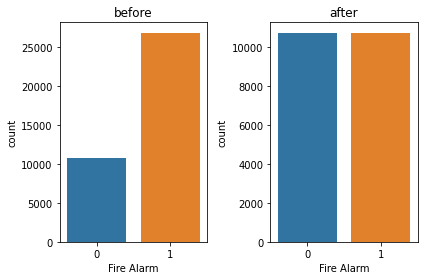

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rus_data = pd.concat([x_rus, y_rus], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

sns.countplot(ax=ax[0], data=training_set, x="Fire Alarm")
ax[0].set_title("before")

sns.countplot(ax=ax[1], data=rus_data, x="Fire Alarm")
ax[1].set_title("after")

fig.tight_layout()

fig.show()

### SMOTE

In [ ]:
# initialize SMOTE
smote = SMOTE(random_state=2)

In [ ]:
# fit smote
x_sm, y_sm = smote.fit_resample(X_train, y_train.reset_index(drop=True))

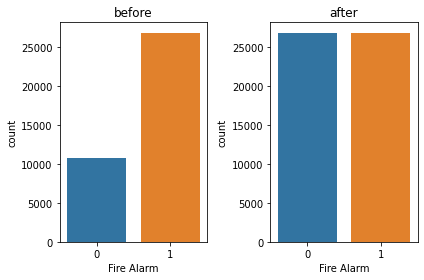

In [ ]:
sm_data = pd.concat([x_sm, y_sm], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

sns.countplot(ax=ax[0], data=training_set, x="Fire Alarm")
ax[0].set_title("before")

sns.countplot(ax=ax[1], data=sm_data, x="Fire Alarm")
ax[1].set_title("after")

fig.tight_layout()

fig.show()

In [ ]:
import joblib

joblib.dump(x_rus, "/content/processed/x_rus.pkl")
joblib.dump(y_rus, "/content/processed/y_rus.pkl")

joblib.dump(x_sm, "/content/processed/x_sm.pkl")
joblib.dump(y_sm, "/content/processed/y_sm.pkl")

joblib.dump(X_valid, "/content/processed/X_valid.pkl")
joblib.dump(y_valid, "/content/processed/y_valid.pkl")

joblib.dump(X_test, "/content/processed/X_test.pkl")
joblib.dump(y_test, "/content/processed/y_test.pkl")

['/content/processed/y_test.pkl']

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from datetime import datetime
from tqdm import tqdm
import yaml
import joblib
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import hashlib

In [ ]:
x_rus = joblib.load("/content/processed/x_rus.pkl")
y_rus = joblib.load("/content/processed/y_rus.pkl")

x_sm = joblib.load("/content/processed/x_sm.pkl")
y_sm = joblib.load("/content/processed/y_sm.pkl")

x_valid = joblib.load("/content/processed/X_valid.pkl")
y_valid = joblib.load("/content/processed/y_valid.pkl")

x_test = joblib.load("/content/processed/X_test.pkl")
y_test = joblib.load("/content/processed/y_test.pkl")

## Feature name error handling

in order to get things right, we need to change feature names that contain squere bracket ([]). Some models can't work with that (e.g. xgboost).

In [ ]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [ ]:
x_rus.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_rus.columns.values]

x_sm.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_sm.columns.values]

x_valid.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_valid.columns.values]

x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

In [ ]:
print("x_rus:", list(x_rus.columns))
print("x_sm:", list(x_sm.columns))
print("x_valid:", list(x_valid.columns))
print("x_test:", list(x_test.columns))

x_rus: ['Temperature_C_', 'Humidity_%_', 'TVOC_ppb_', 'eCO2_ppm_', 'Raw H2', 'Raw Ethanol', 'Pressure_hPa_', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
x_sm: ['Temperature_C_', 'Humidity_%_', 'TVOC_ppb_', 'eCO2_ppm_', 'Raw H2', 'Raw Ethanol', 'Pressure_hPa_', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
x_valid: ['Temperature_C_', 'Humidity_%_', 'TVOC_ppb_', 'eCO2_ppm_', 'Raw H2', 'Raw Ethanol', 'Pressure_hPa_', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
x_test: ['Temperature_C_', 'Humidity_%_', 'TVOC_ppb_', 'eCO2_ppm_', 'Raw H2', 'Raw Ethanol', 'Pressure_hPa_', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']


## Create Log Template

In [ ]:
def time_stamp():
    return datetime.now()

In [ ]:
def create_log_template():
    logger = {
        "model_name" : [],
        "model_uid" : [],
        "training_time" : [],
        "training_date" : [],
        "performance" : [],
        "f1_score_avg" : [],
        "data_configurations" : [],
    }

    return logger

In [ ]:
def training_log_updater(current_log, log_path):
    current_log = current_log.copy()

    try:
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    except FileNotFoundError as ffe:
        with open(log_path, "w") as file:
            file.write("[]")
        file.close()
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    
    last_log.append(current_log)

    with open(log_path, "w") as file:
        json.dump(last_log, file)
        file.close()

    return last_log

## Training and Evaluation

### Initialie Model Object

In [ ]:
lgr_baseline = LogisticRegression()
dct_baseline = DecisionTreeClassifier()
rfc_baseline = RandomForestClassifier()
knn_baseline = KNeighborsClassifier()
xgb_baseline = XGBClassifier()

In [ ]:
list_of_model = {
    "undersampling" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    "smote" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    }

In [ ]:
def train_eval_model(list_of_model, prefix_model_name, x_train, y_train, data_configuration_name, x_valid, y_valid, log_path):

    list_of_model = copy.deepcopy(list_of_model)
    logger = create_log_template()

    for model in tqdm(list_of_model):    
        model_name = prefix_model_name + "-" + model["model_name"]

        start_time = time_stamp()
        model["model_object"].fit(x_train, y_train)
        finished_time = time_stamp()

        elapsed_time = finished_time - start_time
        elapsed_time = elapsed_time.total_seconds()

        y_pred = model["model_object"].predict(x_valid)
        performance = classification_report(y_valid, y_pred, output_dict = True)

        plain_id = str(start_time) + str(finished_time)
        chiper_id = hashlib.md5(plain_id.encode()).hexdigest()

        model["model_uid"] = chiper_id

        logger["model_name"].append(model_name)
        logger["model_uid"].append(chiper_id)
        logger["training_time"].append(elapsed_time)
        logger["training_date"].append(str(start_time))
        logger["performance"].append(performance)
        logger["f1_score_avg"].append(performance["macro avg"]["f1-score"])
        logger["data_configurations"].append(data_configuration_name)

    training_log = training_log_updater(logger, log_path)

    return training_log, list_of_model

### Baseline Model Undersampling

In [ ]:
training_log, list_of_model_rus = train_eval_model(
    list_of_model["undersampling"],
    "baseline_model",
    x_rus,
    y_rus,
    "undersampling",
    x_valid,
    y_valid,
    "/content/log/training_log.json"
)

100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


In [ ]:
list_of_model["undersampling"] = copy.deepcopy(list_of_model_rus)

### Baseline Model SMOTE

In [ ]:
training_log, list_of_model_sm = train_eval_model(
    list_of_model["smote"],
    "baseline_model",
    x_sm,
    y_sm,
    "smote",
    x_valid,
    y_valid,
    "/content/log/training_log.json"
)

100%|██████████| 5/5 [00:15<00:00,  3.04s/it]


In [ ]:
list_of_model["smote"] = copy.deepcopy(list_of_model_sm)

### Best Performance

In [ ]:
def training_log_to_df(training_log):
    training_res = pd.DataFrame()

    for log in tqdm(training_log):
        training_res = pd.concat([training_res, pd.DataFrame(log)])
    
    training_res.sort_values(["f1_score_avg", "training_time"], ascending = [False, True], inplace = True)
    training_res.reset_index(inplace = True, drop = True)
    
    return training_res

In [ ]:
training_res = training_log_to_df(training_log)

100%|██████████| 14/14 [00:00<00:00, 410.29it/s]


In [ ]:
training_res

,model_name,model_uid,training_time,training_date,performance,f1_score_avg,data_configurations
0,baseline_model-DecisionTreeClassifier,5427d4b85edc2b9435f9ae3a2462b404,0.350455,2022-11-07 04:15:17.044922,"{'0': {'precision': 0.9997202014549524, 'recal...",0.999706,smote
1,baseline_model-DecisionTreeClassifier,6e3812dc29efc7d0fca7029d8f21a7da,0.486161,2022-11-07 04:11:55.464410,"{'0': {'precision': 0.9997202014549524, 'recal...",0.999706,smote
2,baseline_model-RandomForestClassifier,a97eb91e332053b85ed9f6e451c7f0ba,7.791764,2022-11-07 04:11:56.014222,"{'0': {'precision': 1.0, 'recall': 0.999160839...",0.999706,smote
3,baseline_model-DecisionTreeClassifier,a593112935e62abeeabb9a68e872ec12,0.109296,2022-11-07 04:01:17.743403,"{'0': {'precision': 0.9997201231458158, 'recal...",0.999608,smote
4,baseline_model-RandomForestClassifier,f49fe5cbcc973e465450fec78ab3d743,2.261558,2022-11-07 04:01:17.883557,"{'0': {'precision': 0.9997201231458158, 'recal...",0.999608,smote
...,...,...,...,...,...,...,...
61,baseline_model-DecisionTreeClassifier,0d306a3316bd6541b5172bbe49c67a7a,1.184028,2022-11-07 02:45:40.050582,"{'0': {'precision': 0.2811542801870063, 'recal...",0.472454,smote
62,baseline_model-DecisionTreeClassifier,f957a5b592fb3f4bb1fe1f06948df83b,1.399147,2022-11-07 02:43:28.165207,"{'0': {'precision': 0.28072403937758017, 'reca...",0.470332,undersampling
63,hyperparams-GridSearchCV-KNeighborsClassifier,1b642f6a02fc4b970cfb621c2bd70b90,482.375530,2022-11-07 03:26:40.381214,"{'0': {'precision': 0.2820987654320988, 'recal...",0.468457,undersampling
64,baseline_model-KNeighborsClassifier,d7926e8fecede9032ca98e285b23ae6c,0.041228,2022-11-07 02:43:39.629741,"{'0': {'precision': 0.2854633289415898, 'recal...",0.465283,undersampling


In [ ]:
def get_best_model(training_log_df, list_of_model):
    model_object = None

    best_model_info = training_log_df.sort_values(["f1_score_avg", "training_time"], ascending = [False, True]).iloc[0]
    
    for configuration_data in list_of_model:
        for model_data in list_of_model[configuration_data]:
            if model_data["model_uid"] == best_model_info["model_uid"]:
                model_object = model_data["model_object"]
                break
    
    if model_object == None:
        raise RuntimeError("The best model not found in your list of model.")
    
    return model_object

In [ ]:
model = get_best_model(training_res, list_of_model)

In [ ]:
joblib.dump(model, "/content/model/model.pkl")

['/content/model/model.pkl']

### Hyperparameter Tuning with new model

In [ ]:
dist_params_knn = {
    "algorithm" : ["ball_tree", "kd_tree", "brute"],
    "n_neighbors" : [2, 3, 4, 5, 6, 10, 15, 20, 25],
    "leaf_size" : [2, 3, 4, 5, 6, 10, 15, 20, 25],
}

In [ ]:
knn_enh = GridSearchCV(KNeighborsClassifier(), dist_params_knn, n_jobs = -1, verbose = 420)

In [ ]:
list_of_model["undersampling"].append({"model_name": knn_enh.__class__.__name__ + "-" + knn_enh.estimator.__class__.__name__, "model_object": copy.deepcopy(knn_enh), "model_uid": ""})
list_of_model["smote"].append({"model_name": knn_enh.__class__.__name__ + "-" + knn_enh.estimator.__class__.__name__, "model_object": copy.deepcopy(knn_enh), "model_uid": ""})

In [ ]:
training_log, list_of_model_rus_hyp = train_eval_model(
    [list_of_model["undersampling"][-1]],
    "hyperparams",
    x_rus,
    y_rus,
    "undersampling",
    x_valid,
    y_valid,
    "/content/log/training_log.json"
)

  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
100%|██████████| 1/1 [08:07<00:00, 487.45s/it]


In [ ]:
list_of_model["undersampling"][-1] = copy.deepcopy(list_of_model_rus_hyp[0])

In [ ]:
list_of_model["undersampling"][-1]

{'model_name': 'GridSearchCV-KNeighborsClassifier',
 'model_object': GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
              param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'leaf_size': [2, 3, 4, 5, 6, 10, 15, 20, 25],
                          'n_neighbors': [2, 3, 4, 5, 6, 10, 15, 20, 25]},
              verbose=420),
 'model_uid': '1b642f6a02fc4b970cfb621c2bd70b90'}

In [ ]:
training_log_to_df(training_log)

100%|██████████| 3/3 [00:00<00:00, 272.33it/s]


,model_name,model_uid,training_time,training_date,performance,f1_score_avg,data_configurations
0,baseline_model-LogisticRegression,3ddac93a3d0daa5c227c59f52d378796,0.363796,2022-11-07 02:43:27.706283,"{'0': {'precision': 0.28642111050027486, 'reca...",0.500703,undersampling
1,baseline_model-LogisticRegression,089b6d7d34d342e8def99278958b58ff,0.369376,2022-11-07 02:45:39.593658,"{'0': {'precision': 0.28642111050027486, 'reca...",0.500703,smote
2,baseline_model-XGBClassifier,a7e12932bb04162d15e13e9710200668,1.158081,2022-11-07 02:45:52.034885,"{'0': {'precision': 0.2766509433962264, 'recal...",0.491455,smote
3,baseline_model-XGBClassifier,060ac290a231da4fb785c1add06b1835,1.265338,2022-11-07 02:43:40.130651,"{'0': {'precision': 0.2766509433962264, 'recal...",0.491455,undersampling
4,baseline_model-RandomForestClassifier,ff48d9376b62d6d41afdc135c4bc6827,9.768748,2022-11-07 02:43:29.599378,"{'0': {'precision': 0.29045571797076525, 'reca...",0.487943,undersampling
5,baseline_model-RandomForestClassifier,68f1e6136be1a5decd49bb2e990f24ed,10.026667,2022-11-07 02:45:41.264270,"{'0': {'precision': 0.2843204382060938, 'recal...",0.481468,smote
6,baseline_model-DecisionTreeClassifier,0d306a3316bd6541b5172bbe49c67a7a,1.184028,2022-11-07 02:45:40.050582,"{'0': {'precision': 0.2811542801870063, 'recal...",0.472454,smote
7,baseline_model-DecisionTreeClassifier,f957a5b592fb3f4bb1fe1f06948df83b,1.399147,2022-11-07 02:43:28.165207,"{'0': {'precision': 0.28072403937758017, 'reca...",0.470332,undersampling
8,hyperparams-GridSearchCV-KNeighborsClassifier,1b642f6a02fc4b970cfb621c2bd70b90,482.375530,2022-11-07 03:26:40.381214,"{'0': {'precision': 0.2820987654320988, 'recal...",0.468457,undersampling
9,baseline_model-KNeighborsClassifier,d7926e8fecede9032ca98e285b23ae6c,0.041228,2022-11-07 02:43:39.629741,"{'0': {'precision': 0.2854633289415898, 'recal...",0.465283,undersampling


In [ ]:
y_pred = model.predict(x_valid)

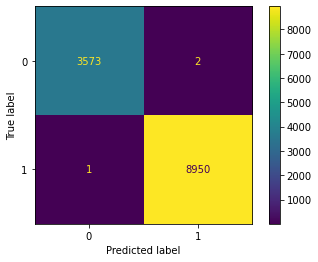

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred)